[参考](https://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html)。

+ 年龄缺失值填充办法：分组求平均值。
+ 连续型变量
+ 这篇文章特征工程做得比较好。

In [110]:
import pandas as pd

data_train = pd.read_csv('../input/train.csv')
data_test = pd.read_csv('../input/test.csv')

In [111]:
data_train.shape, data_test.shape

((891, 12), (418, 11))

## EDA

+ 性别

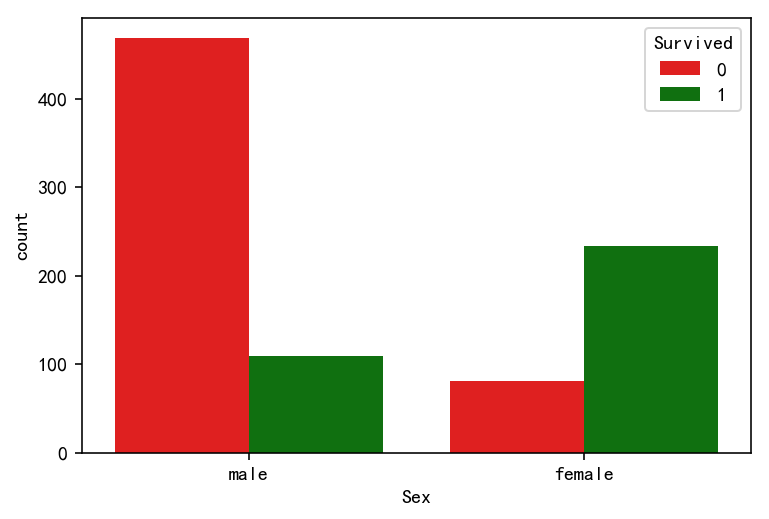

In [112]:
import seaborn as sns

color = {0: 'r', 1: 'g'}

sns.countplot(x='Sex', data=data_train, hue='Survived', palette=color)
plt.show()

In [113]:
sex_survived_pivot_table = pd.pivot_table(
    data_train,
    index='Sex',
    columns='Survived',
    values='PassengerId',
    aggfunc='count')
print('列联表')
sex_survived_pivot_table

列联表


Survived,0,1
Sex,,
female,81,233
male,468,109


In [114]:
from scipy.stats import chi2_contingency

chi2_contingency(sex_survived_pivot_table.values)[1]

1.1973570627755645e-58

可以看到 $p$ 值为 $1.1973570627755645e-58$，远小于 $0.05$，因此“性别”和“幸存”的确不是独立的，“性别”是一项预测“是否幸存”的重要特征。

+ Age

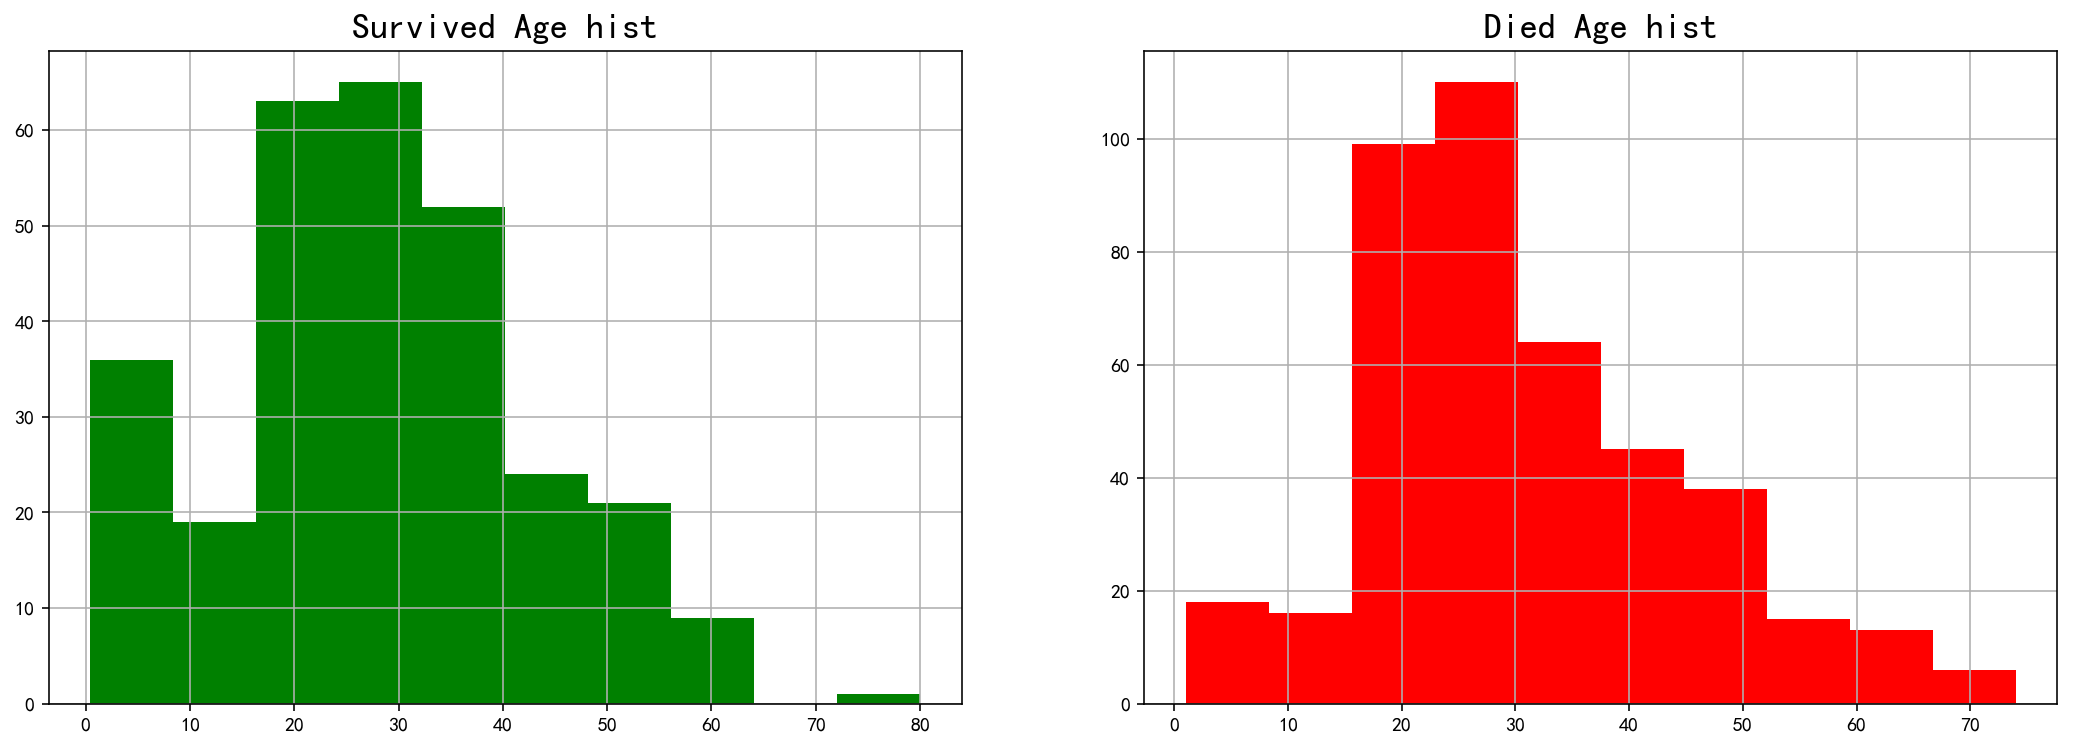

In [115]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18, 6)

data_train[data_train['Survived'] == 1]['Age'].hist(color='g', ax=axes[0])
axes[0].set_title('Survived Age hist', size=18)

data_train[data_train['Survived'] == 0]['Age'].hist(color='r', ax=axes[1])
axes[1].set_title('Died Age hist', size=18)

plt.show()

可以看出，年轻人幸存较多。

+ 票价

连续型变量，可以使用箱线图或者小提琴图看分布。

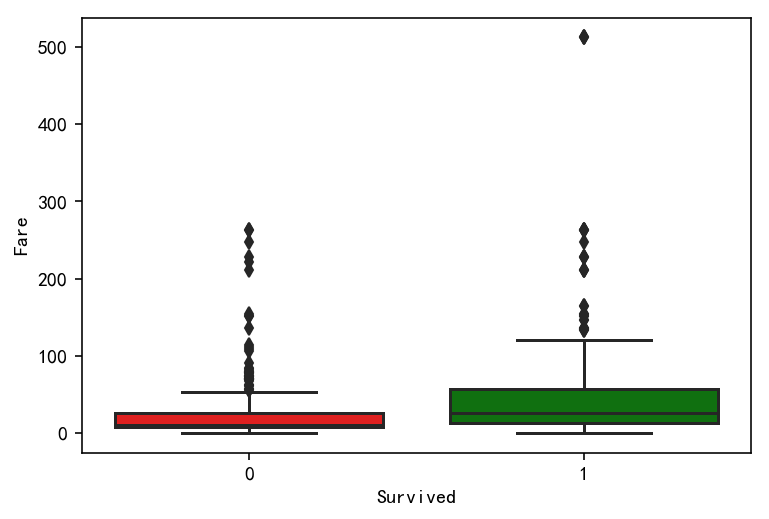

In [116]:
sns.boxplot(x="Survived", y="Fare", data=data_train, palette={0: 'r', 1: 'g'})
plt.show()

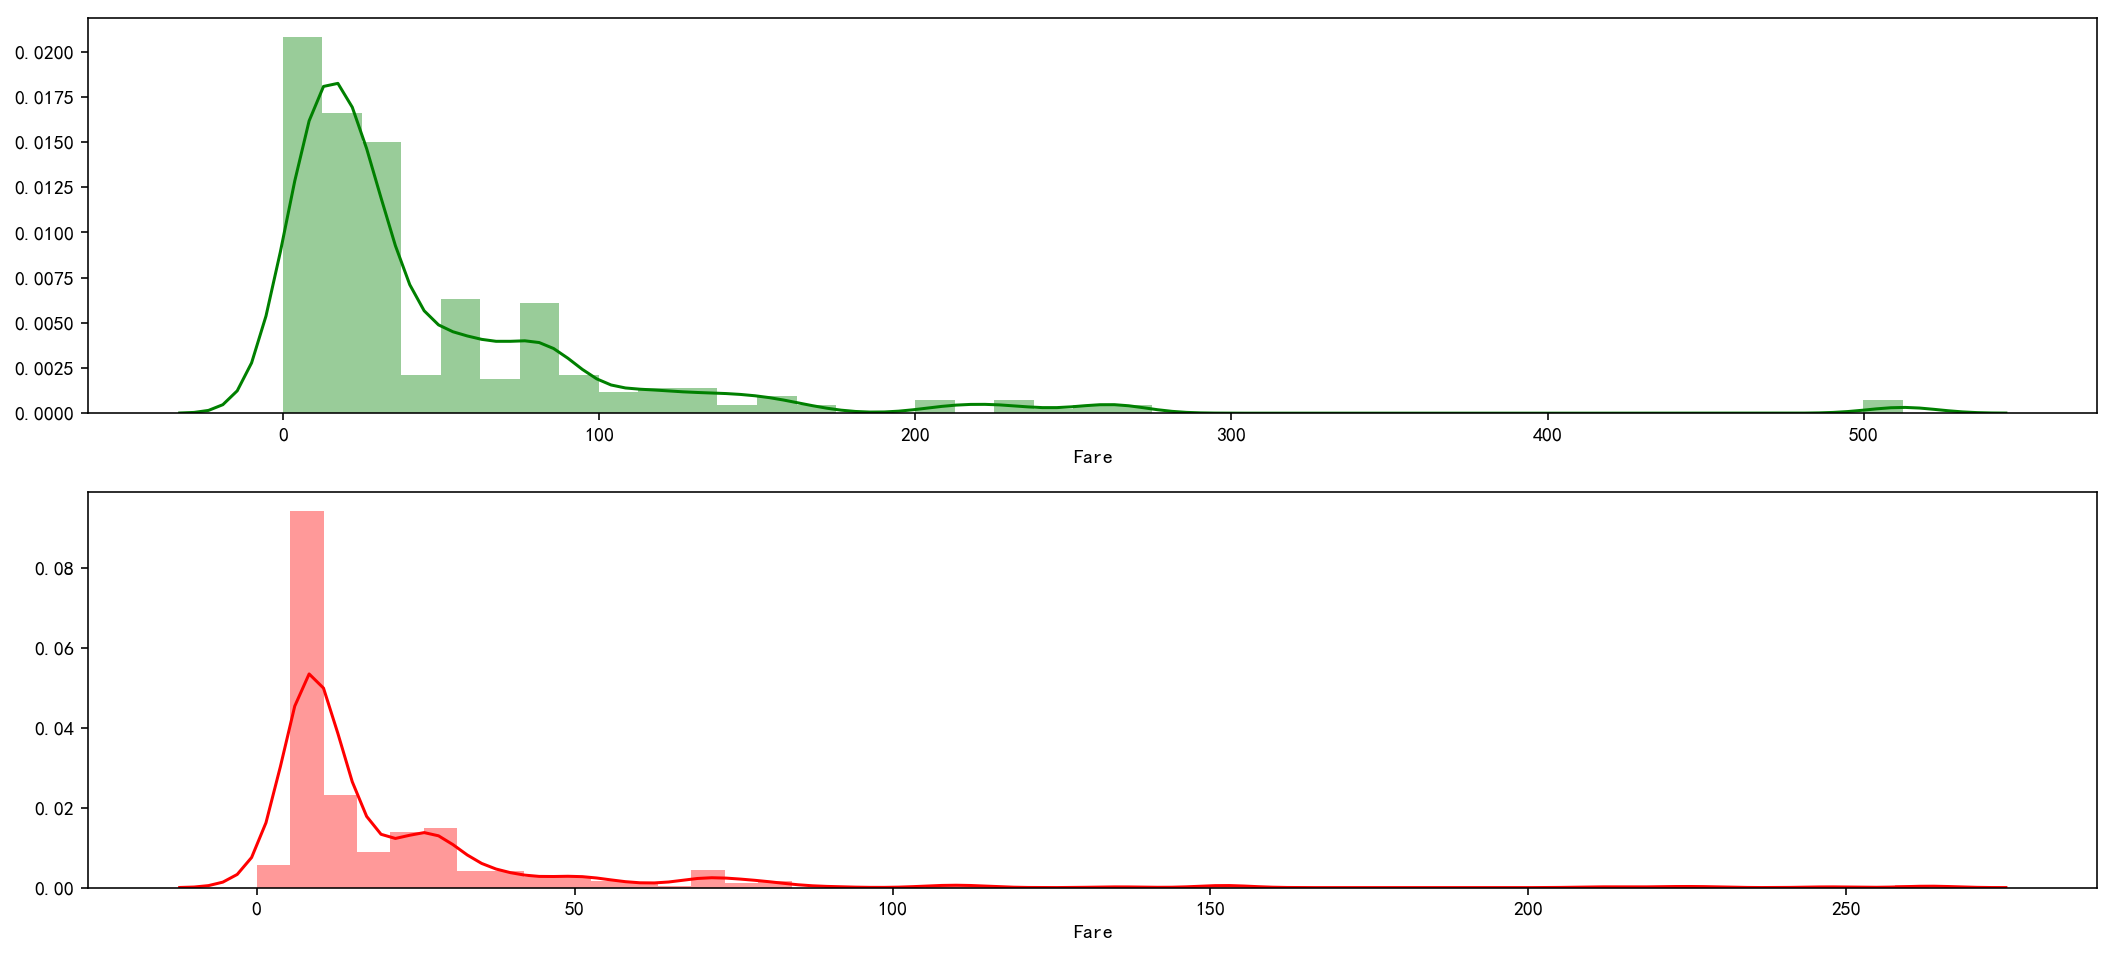

In [117]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 8))
sns.distplot(
    data_train[data_train['Survived'] == 1]['Fare'], color='g', ax=axes[0])
sns.distplot(
    data_train[data_train['Survived'] == 0]['Fare'], color='r', ax=axes[1])
plt.show()

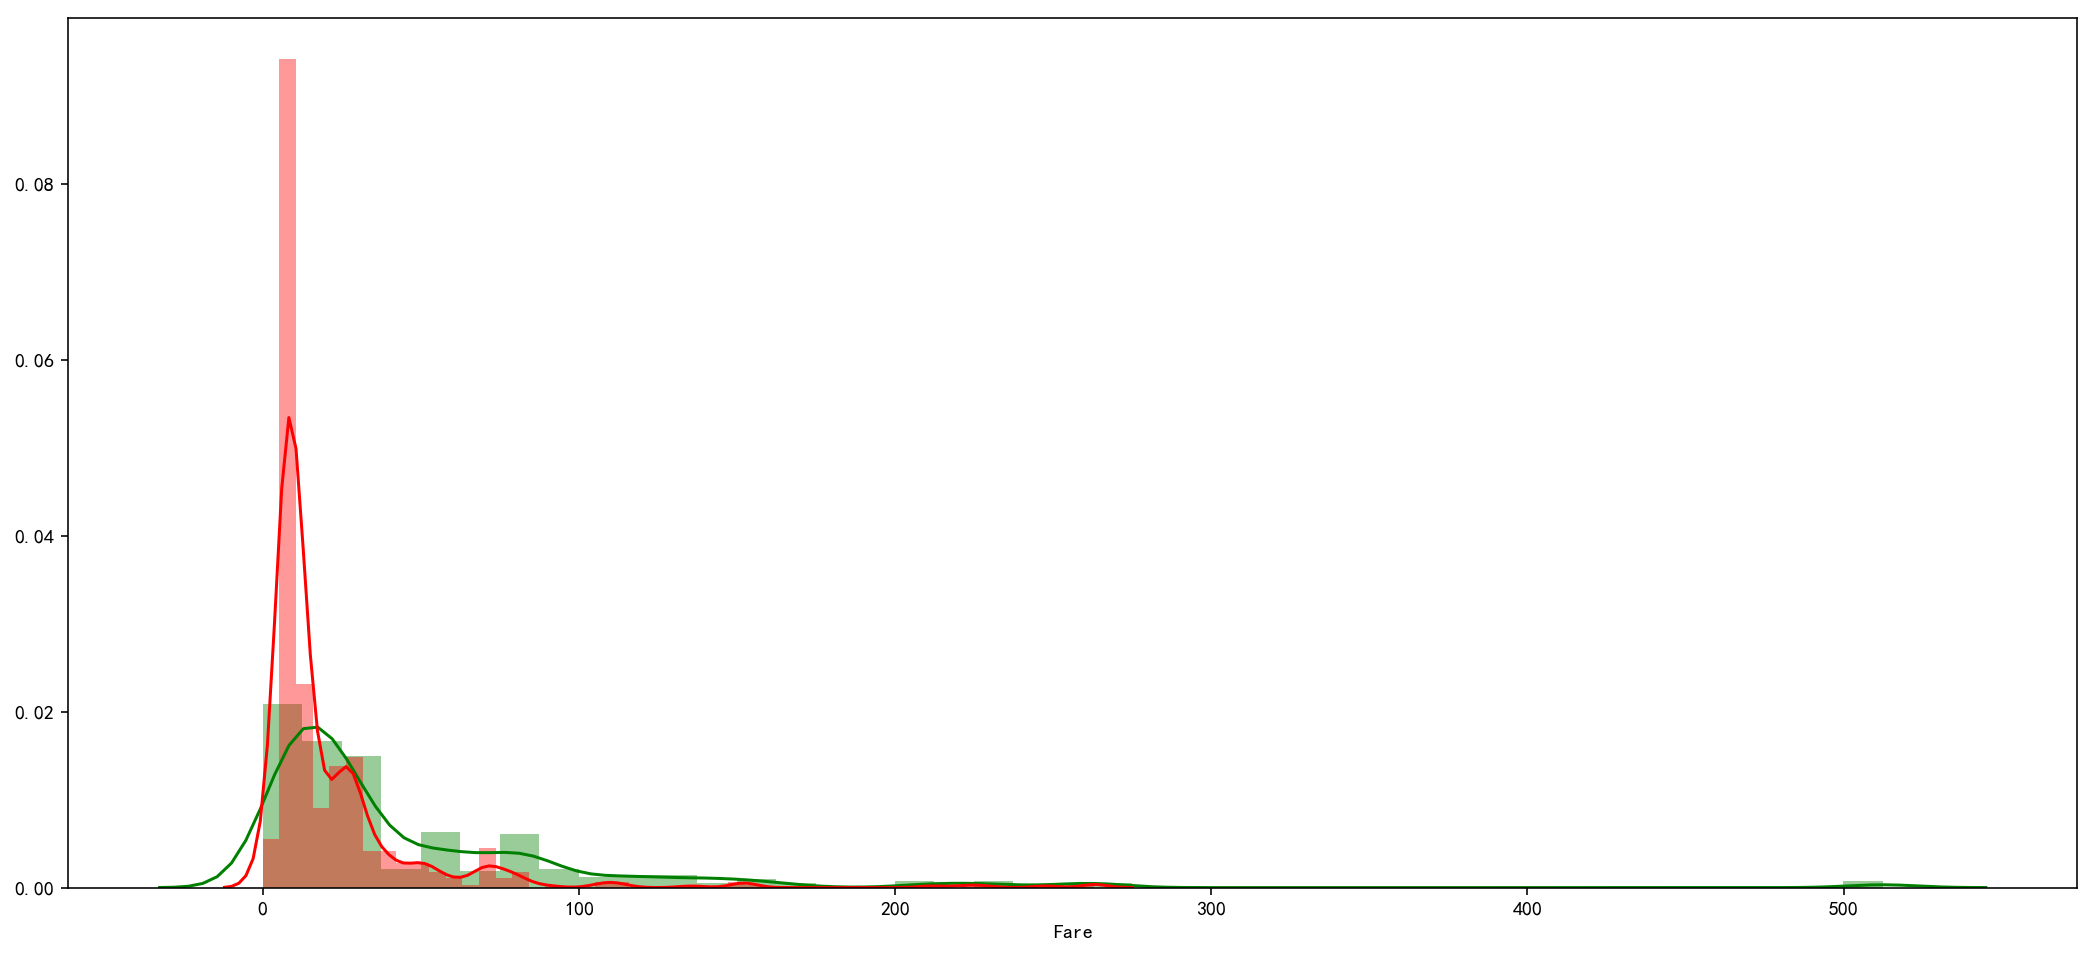

In [118]:
plt.figure(figsize=(18, 8))
sns.distplot(data_train[data_train['Survived'] == 1]['Fare'], color='g')
sns.distplot(data_train[data_train['Survived'] == 0]['Fare'], color='r')
plt.show()

可以看出，票价比较低的，死亡的人数比较多，因此票价是一个重要的特征。

+ Pclass

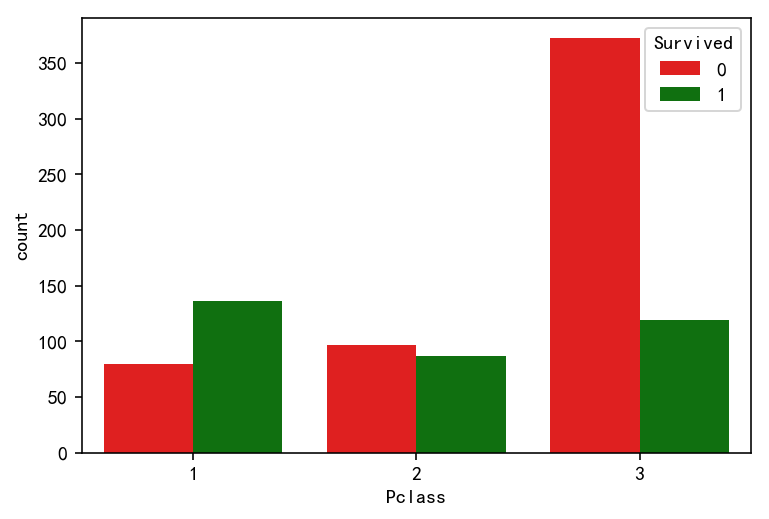

In [119]:
color = {0: 'r', 1: 'g'}

sns.countplot(x='Pclass', hue='Survived', palette=color, data=data_train)
plt.show()

可以看到，$1$ 号乘客等级幸存者较多， $3$ 号乘客等级死亡比幸存多很多，因此乘客等级是一个预测是否幸存的重要变量。

In [120]:
pclass_survived_pivot_table = pd.pivot_table(
    data_train,
    index='Pclass',
    columns='Survived',
    values=['PassengerId'],
    aggfunc='count')
pclass_survived_pivot_table

PassengerId     
Survived           0    1
Pclass                   
1                 80  136
2                 97   87
3                372  119

In [121]:
chi2_contingency(pclass_survived_pivot_table.values)[1]

4.549251711298793e-23

+ Fare

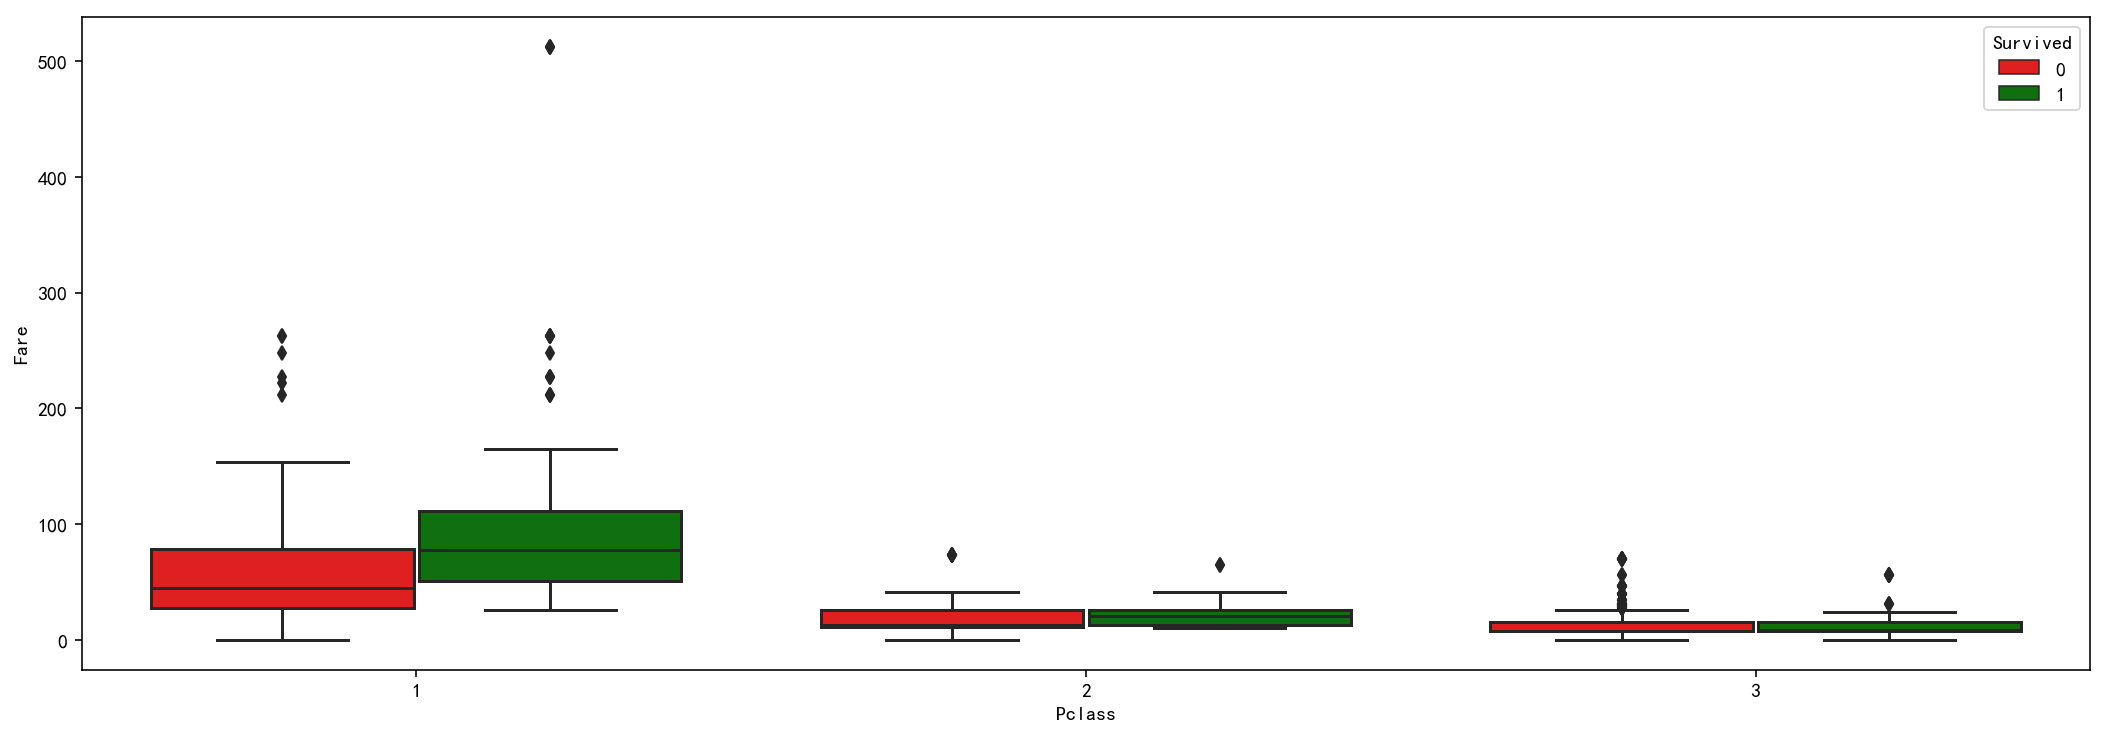

In [122]:
plt.figure(figsize=(18, 6))

sns.boxplot(
    x='Pclass', y='Fare', data=data_train, hue='Survived', palette=color)
plt.show()

乘客等级为 1 的，票价相对较高。

+ Embarked

In [123]:
data_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

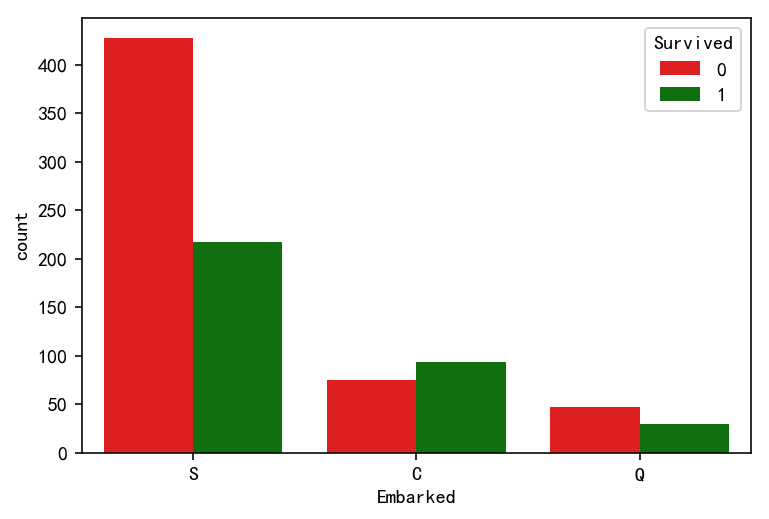

In [124]:
sns.countplot(x='Embarked', hue='Survived', palette=color, data=data_train)
plt.show()

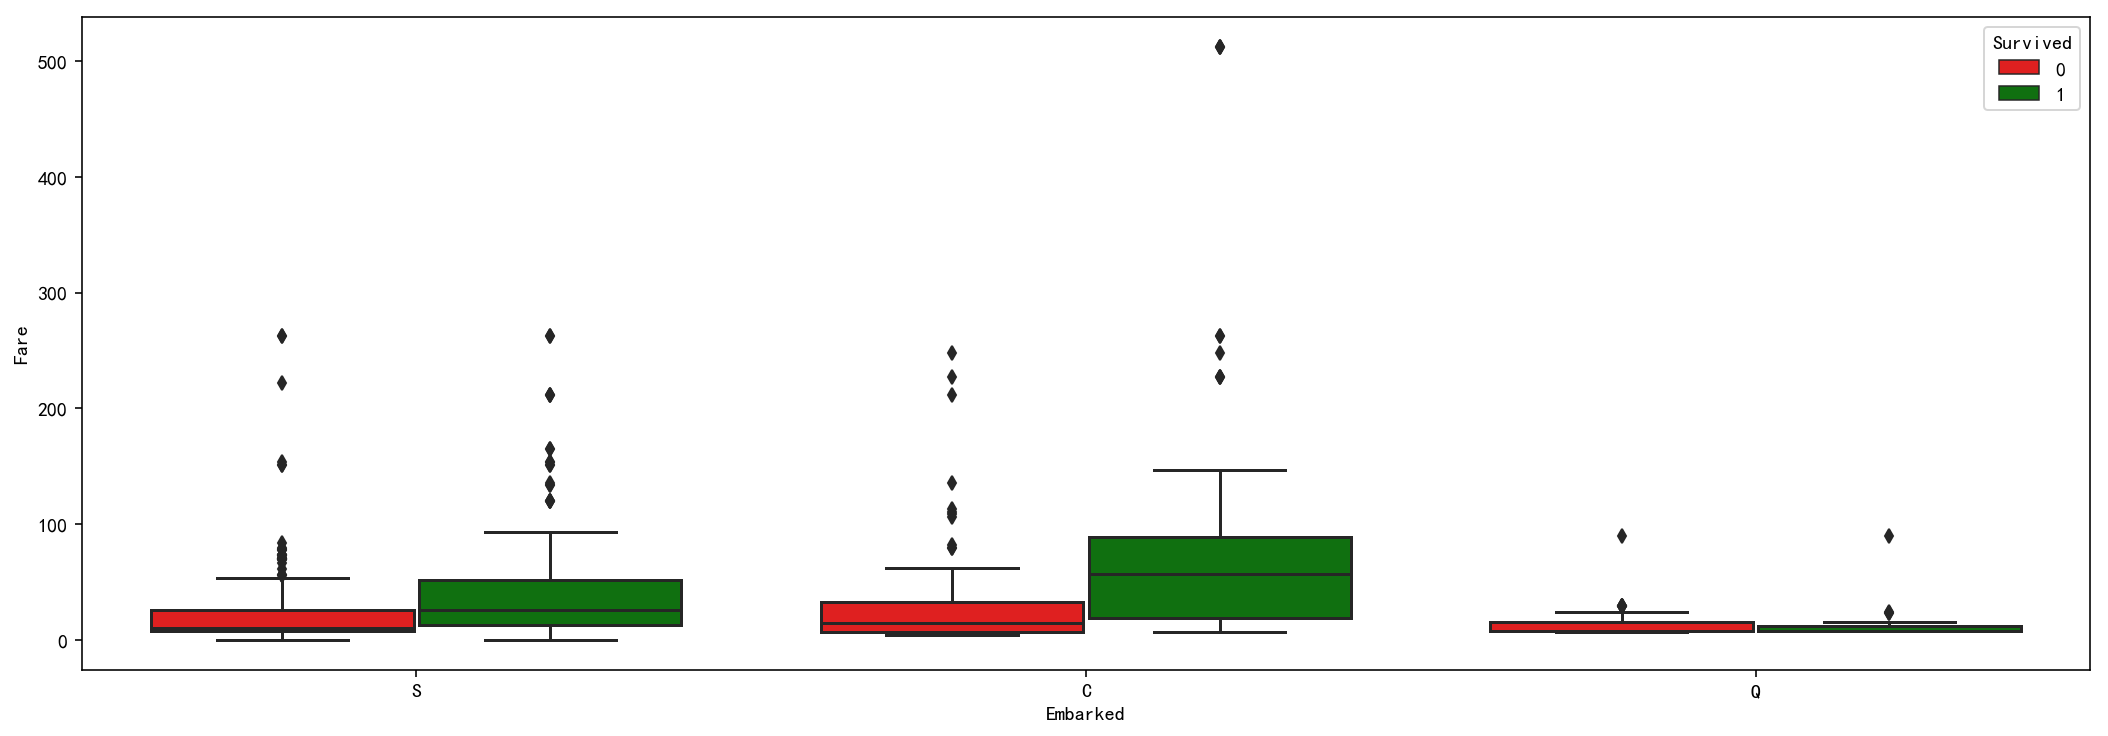

In [125]:
plt.figure(figsize=(18, 6))
sns.boxplot(
    x='Embarked', y='Fare', data=data_train, hue='Survived', palette=color)
plt.show()

In [126]:
embarked_survived_pivot_table = pd.pivot_table(
    data=data_train,
    index='Embarked',
    columns='Survived',
    values='PassengerId',
    aggfunc='count')
embarked_survived_pivot_table

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [127]:
chi2_contingency(embarked_survived_pivot_table.values)[1]

1.769922284120912e-06

## 特征工程

In [128]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [129]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [130]:
y = data_train.Survived
PassengerId = data_test.PassengerId
data_train.drop(['Survived'], axis=1, inplace=True)

### 合在一起

In [131]:
combined = pd.concat([data_train, data_test], sort=False, axis=0)
combined.shape

(1309, 11)

In [132]:
combined.drop(['PassengerId'], inplace=True, axis=1)

In [133]:
combined.shape

(1309, 10)

### 抽取 Title 特征

In [134]:
combined['title'] = combined['Name'].map(
    lambda x: x.split(',')[1].split('.')[0].strip())

In [135]:
combined['title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Don               1
Lady              1
Jonkheer          1
Capt              1
the Countess      1
Mme               1
Sir               1
Dona              1
Name: title, dtype: int64

In [136]:
# 再根据这些 title 细分，是官员，还是皇室，还是女士、先生、小姐
combined['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [137]:
Title_Dictionary = {
    "Mr": "Mr",
    "Mrs": "Mrs",
    "Miss": "Miss",
    "Master": "Master",
    "Don": "Royalty",
    "Rev": "Officer",
    "Dr": "Officer",
    "Mme": "Mrs",
    "Ms": "Mrs",
    "Major": "Officer",
    "Lady": "Royalty",
    "Sir": "Royalty",
    "Mlle": "Miss",
    "Col": "Officer",
    "Capt": "Officer",
    "the Countess": "Royalty",
    "Jonkheer": "Royalty",
    "Dona": 'Mrs'
}

In [138]:
combined['Title'] = combined['title'].map(Title_Dictionary)
combined['Title'].value_counts()

Mr         757
Miss       262
Mrs        201
Master      61
Officer     23
Royalty      5
Name: Title, dtype: int64

In [139]:
del combined['Name']
del combined['title']

In [140]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


### 抽取家庭规模

In [141]:
combined['FamilySize'] = combined['SibSp'] + combined['Parch'] + 1
combined['FamilySize'].head()

0    2
1    2
2    1
3    2
4    1
Name: FamilySize, dtype: int64

In [142]:
def deal_with_family_size(num):
    if num == 1:
        return 'Singleton'
    elif num <= 4:
        return 'SmallFamily'
    elif num >= 5:
        return 'LargeFamily'
    return num

combined['FamilySize'] = combined['FamilySize'].map(deal_with_family_size)

## 缺失值填充

### Age

In [143]:
combined.isnull().sum()

Pclass           0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin         1014
Embarked         2
Title            0
FamilySize       0
dtype: int64

根据 Sex、Pclass 和 Title 分组，如果落在相同的组别里，就用这个组别的中位数填充。

In [144]:
combined.groupby(['Sex', 'Pclass', 'Title'])['Age'].mean()

Sex     Pclass  Title  
female  1       Miss       30.131148
                Mrs        42.869565
                Officer    49.000000
                Royalty    40.500000
        2       Miss       20.717083
                Mrs        33.418182
        3       Miss       17.360874
                Mrs        32.326531
male    1       Master      6.984000
                Mr         41.450758
                Officer    51.090909
                Royalty    42.333333
        2       Master      2.757273
                Mr         32.346715
                Officer    40.700000
        3       Master      6.090000
                Mr         28.318910
Name: Age, dtype: float64

In [145]:
age_group_mean = combined.groupby(['Sex', 'Pclass', 'Title'])['Age'].mean().reset_index()
age_group_mean

,Sex,Pclass,Title,Age
0,female,1,Miss,30.131148
1,female,1,Mrs,42.869565
2,female,1,Officer,49.000000
3,female,1,Royalty,40.500000
4,female,2,Miss,20.717083
5,female,2,Mrs,33.418182
6,female,3,Miss,17.360874
7,female,3,Mrs,32.326531
8,male,1,Master,6.984000
9,male,1,Mr,41.450758


In [146]:
def select_group_age_median(row):
    condition = ((row['Sex'] == age_group_mean['Sex']) &
                 (row['Pclass'] == age_group_mean['Pclass']) &
                 (row['Title'] == age_group_mean['Title']))
    return age_group_mean[condition]['Age'].values[0]

In [147]:
import numpy as np

# 针对每一行做映射，所以要加上 `axis=1`
combined['Age'] = combined.apply(
    lambda x: select_group_age_median(x) if np.isnan(x['Age']) else x['Age'],
    axis=1)

In [148]:
def age_bin(x):
    if x <= 18:
        return 'child'
    elif x <= 30:
        return 'young'
    elif x <= 55:
        return 'midlife'
    else:
        return 'old'


combined['age_bin'] = combined['Age'].map(age_bin)

In [149]:
combined['age_bin'].head()

0      young
1    midlife
2      young
3    midlife
4    midlife
Name: age_bin, dtype: object

+ Fare



In [150]:
combined.isnull().sum()

Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin         1014
Embarked         2
Title            0
FamilySize       0
age_bin          0
dtype: int64

In [151]:
combined['Fare'].fillna(combined['Fare'].mean(), inplace=True)

+ Embarked 

Embarked 有两个缺失值，使用众数填充就好了。

In [152]:
combined['Embarked'].fillna(combined['Embarked'].mode(), inplace=True)

### Cabin

In [153]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,age_bin
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,SmallFamily,young
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,SmallFamily,midlife
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Singleton,young
3,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,SmallFamily,midlife
4,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr,Singleton,midlife


In [154]:
combined.loc[combined['Cabin'].notnull(), 'Cabin'] = 'yes'
combined.loc[combined['Cabin'].isnull(), 'Cabin'] = 'no'

In [155]:
combined['Cabin'].value_counts()

no     1014
yes     295
Name: Cabin, dtype: int64

### 离散型变量处理成独热编码

处理成独热编码以后，要把原始变量删掉。

In [156]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,age_bin
0,3,male,22.0,1,0,A/5 21171,7.2500,no,S,Mr,SmallFamily,young
1,1,female,38.0,1,0,PC 17599,71.2833,yes,C,Mrs,SmallFamily,midlife
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,no,S,Miss,Singleton,young
3,1,female,35.0,1,0,113803,53.1000,yes,S,Mrs,SmallFamily,midlife
4,3,male,35.0,0,0,373450,8.0500,no,S,Mr,Singleton,midlife


In [157]:
combined = pd.get_dummies(
    combined,
    columns=[
        'Sex', 'Cabin', 'Pclass', 'Embarked', 'Title', 'FamilySize', 'age_bin'
    ],
    drop_first=True)

In [160]:
combined.drop(['Ticket'], axis=1, inplace=True)

In [161]:
X_train = combined.iloc[:891]
X_test = combined.iloc[891:]

In [162]:
X_train.head()

,Age,SibSp,Parch,Fare,Sex_male,Cabin_yes,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,FamilySize_Singleton,FamilySize_SmallFamily,age_bin_midlife,age_bin_old,age_bin_young
0,22.0,1,0,7.2500,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1
1,38.0,1,0,71.2833,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0
2,26.0,0,0,7.9250,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1
3,35.0,1,0,53.1000,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0
4,35.0,0,0,8.0500,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0


In [163]:
X_test.head()

,Age,SibSp,Parch,Fare,Sex_male,Cabin_yes,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,FamilySize_Singleton,FamilySize_SmallFamily,age_bin_midlife,age_bin_old,age_bin_young
0,34.5,0,0,7.8292,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0
1,47.0,1,0,7.0000,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0
2,62.0,0,0,9.6875,1,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0
3,27.0,0,0,8.6625,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1
4,22.0,1,1,12.2875,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1


In [164]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_features='sqrt')

In [165]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rfc, X_train, y, cv=10)
scores

array([0.81111111, 0.83333333, 0.76404494, 0.83146067, 0.82022472,
       0.80898876, 0.7752809 , 0.78651685, 0.82022472, 0.86363636])

In [166]:
scores.mean()

0.8114822381114515

这个数据不是拿全部数据训练出来的，是交叉验证的结果。

下面我们把全部的数据拿来训练一遍。

In [167]:
rfc.fit(X_train, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

树模型一般都可以得到特征的重要性。

In [169]:
rfc.feature_importances_

array([0.19290216, 0.03280234, 0.02458146, 0.22831078, 0.12098878,
       0.04082741, 0.01539012, 0.05310283, 0.00872717, 0.02388419,
       0.03608188, 0.10461793, 0.04243638, 0.00628246, 0.00082492,
       0.01149576, 0.0229877 , 0.01376569, 0.00525269, 0.01473736])

In [171]:
X_train.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Cabin_yes', 'Pclass_2',
       'Pclass_3', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Officer', 'Title_Royalty', 'FamilySize_Singleton',
       'FamilySize_SmallFamily', 'age_bin_midlife', 'age_bin_old',
       'age_bin_young'],
      dtype='object')

In [172]:
feature_importances = pd.Series(rfc.feature_importances_, X_train.columns)
feature_importances.sort_values(ascending=False, inplace=True)
feature_importances

Fare                      0.228311
Age                       0.192902
Sex_male                  0.120989
Title_Mr                  0.104618
Pclass_3                  0.053103
Title_Mrs                 0.042436
Cabin_yes                 0.040827
Title_Miss                0.036082
SibSp                     0.032802
Parch                     0.024581
Embarked_S                0.023884
FamilySize_SmallFamily    0.022988
Pclass_2                  0.015390
age_bin_young             0.014737
age_bin_midlife           0.013766
FamilySize_Singleton      0.011496
Embarked_Q                0.008727
Title_Officer             0.006282
age_bin_old               0.005253
Title_Royalty             0.000825
dtype: float64

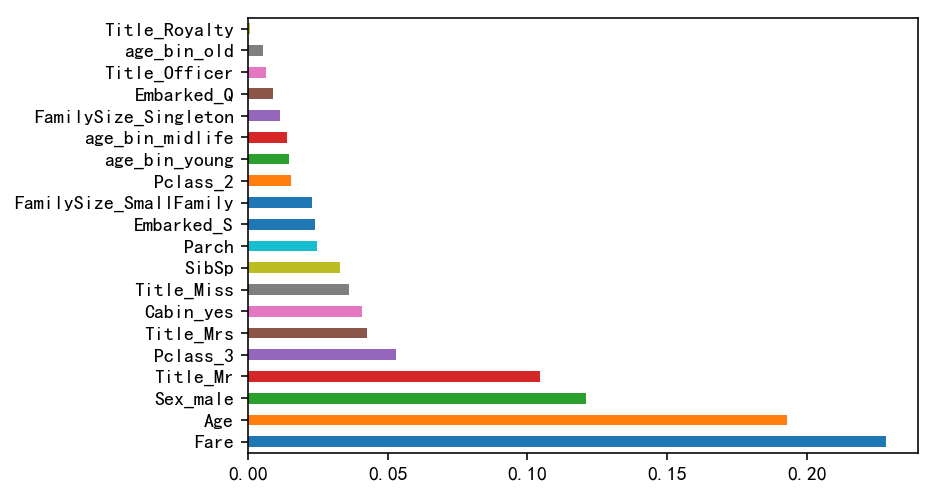

In [173]:
feature_importances.plot(kind='barh')
plt.show()

## SelectFromModel

In [175]:
# 传入这个类的模型，必须要有 `feature_importances_` 这个属性。
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(rfc, prefit=True)
train_reduced = sfm.transform(X_train)

In [176]:
train_reduced.shape

(891, 5)

In [177]:
train_reduced

array([[22.        ,  7.25      ,  1.        ,  1.        ,  1.        ],
       [38.        , 71.2833    ,  0.        ,  0.        ,  0.        ],
       [26.        ,  7.925     ,  0.        ,  1.        ,  0.        ],
       ...,
       [17.36087379, 23.45      ,  0.        ,  1.        ,  0.        ],
       [26.        , 30.        ,  1.        ,  0.        ,  1.        ],
       [32.        ,  7.75      ,  1.        ,  1.        ,  1.        ]])

最后只剩下 5 个特征了。

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

logreg = LogisticRegression(solver='newton-cg')
rf = RandomForestClassifier(n_estimators=100)
gboost = GradientBoostingClassifier()
xgbc = XGBClassifier()

In [184]:
# 把这些模型放进一个列表中
models = [logreg, rf, gboost, xgbc]

In [185]:
from sklearn.model_selection import cross_val_score

for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = cross_val_score(
        estimator=model, X=train_reduced, y=y, scoring='accuracy', cv=5)
    print('CV score = {0}'.format(score.mean()))
    print('******')

Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegression'>
CV score = 0.7945739873259929
******
Cross-validation of : <class 'sklearn.ensemble.forest.RandomForestClassifier'>
CV score = 0.8170271371561043
******
Cross-validation of : <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
CV score = 0.8271397094886954
******
Cross-validation of : <class 'xgboost.sklearn.XGBClassifier'>
CV score = 0.8305673442710388
******


In [190]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# 网格搜索开关
run_gs = True

if run_gs:
    parameter_grid = {
        'max_depth': [4, 6, 8],
        'n_estimators': [50, 10],
        'max_features': ['sqrt', 'auto', 'log2'],
        'min_samples_split': [2, 3, 10],
        'min_samples_leaf': [1, 3, 10],
        'bootstrap': [True, False],
    }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(
        forest,
        scoring='accuracy',
        param_grid=parameter_grid,
        cv=cross_validation,
        verbose=1)

    grid_search.fit(train_reduced, y)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))

else:
    parameters = {
        'bootstrap': False,
        'min_samples_leaf': 3,
        'n_estimators': 50,
        'min_samples_split': 10,
        'max_features': 'sqrt',
        'max_depth': 6
    }

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best score: 0.8428731762065096
Best parameters: {'bootstrap': True, 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 50}


[Parallel(n_jobs=1)]: Done 1620 out of 1620 | elapsed:   53.2s finished


In [191]:
parameters

{'bootstrap': True,
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 50}

In [195]:
model = RandomForestClassifier(**parameters)
model.fit(X_train, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [196]:
y_pred = model.predict(X_test)

In [197]:
res = pd.DataFrame({'PassengerId': PassengerId, 'Survived': y_pred})
res.to_csv('../output/gridsearch_rf.csv', index=False)
# 0.79425 还行

## XGBClassifier 没有网格搜索过

In [200]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()
xgbc.fit(X_train, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [201]:
y_pred = xgbc.predict(X_test)

In [202]:
res = pd.DataFrame({'PassengerId': PassengerId, 'Survived': y_pred})
res.to_csv('../output/xgbc_ori.csv', index=False)
# 0.77511





泰坦尼克号幸存者预测问题是一个二分类问题，目标变量是离散型变量，1 表示幸存，即 Survived ，0 表示遇难。

| 字段名      | 中文解释                             | 类型   | 说明                 |
| ----------- | ------------------------------------ | ------ | -------------------- |
| PassengerId | 乘客 ID                              | 离散型 |                      |
| Pclass      | 乘客等级                             | 离散型 | 1、2、3 等舱位、有序 |
| Name        | 乘客姓名                             | 离散型 |                      |
| Sex         | 性别                                 | 离散型 | female 和 male       |
| Age         | 年龄                                 | 连续型 | 整型                 |
| SibSp       | 与乘客一起旅行的兄弟姐妹和配偶的数量 | 连续型 | 整型                 |
| Parch       | 与乘客一起旅行的父母和孩子的数量     | 连续型 | 整型                 |
| Ticket      | 船票号码                             | 离散型 | 是一串文字           |
| Fare        | 票价                                 | 连续型 | 浮点数               |
| Cabin       | 客舱                                 | 离散型 | 缺失值较多           |
| Embarked    | 登船港口                             | 离散型 |                      |



数据刚拿到的时候，我们常常使用 `train.shape` 、 `train.head()` 和 `train.describe()` 看一看数据长啥样，有多少个数据，多少个特征。

然后看一看缺失值。`data_train.isnull().sum()`。

## 探索性数据分析（EDA）

**分析特征和目标变量之间的关系**。


EDA ，即 Exploratory Data Analysis ，这一步比较靠经验了。不过也有一定套路。对于泰坦尼克号问题比较简单，就是单独把字段和目标变量拿出来，分析它们之间的关系，即看看那一些特征对于最终我们要预测的变量有关。

> EDA 的目的，我个人觉得就是在验证我们对问题的猜想，就想我们觉得一个人是否能够考上好大学，跟这个人的家庭教育程度有关，那么我们就会去调查这个人父母的受教育程度，通过各种手段来验证我们的猜想，这方面严格的、科学的方式是使用“数理统计”学中“假设检验”的方法，但是初学数据分析的时候，我们往往可以先通过绘图，直观地进行判断（就想其实是一些板上定钉的事情，我们可以先不加严格证明先使用它，绘图具有说服力就好）。

我们常常使用绘图的方式，来验证我们的猜测，因为这样更直观。但实际上，使用“数理统计”中的“假设检验”的知识更加合理（这方面的理论基础我还很薄弱，还要加强学习）。

+ 这一步往往要根据目标变量的定义和问题场景，进行“猜测”，然后绘图验证我们的猜想。



### 猜测：性别是一个和幸存有关的很重要的变量

首先，要注意到 `Sex` 是离散型分类变量，只有两个取值：`male` 和 `female`。


外国人常以“女士优先”，有“绅士风度”，即使是在生死攸关的问题上也是这样。因此我们有理由猜测“男士”会让“女人”和“孩子”先上救生艇，实际上电影也是这么演的。盗个图感慨一下。





```python
data_train.groupby('Sex', as_index=False)['PassengerId'].agg('count')
```



```python
data_train[['Sex', 'PassengerId']].groupby('Sex', as_index=False).agg('count')
```



列联表：

```python
Sex_Survived_pivot_table = pd.pivot_table(
    data_train,
    index='Sex',
    columns='Survived',
    values='PassengerId',
    aggfunc='count')

Sex_Survived_pivot_table.index = ['女士', '男士']
Sex_Survived_pivot_table.columns = ['死亡', '幸存']
Sex_Survived_pivot_table.reindex(columns=['幸存', '死亡'])
```



```python
data_train['Age'][np.logical_and(data_train['Age'].notnull().values,
                                 (data_train['Survived'] == 1).values)]
data_train['Age'][data_train['Age'].notnull().values &
                                 (data_train['Survived'] == 1).values]
```



```python
combined.reset_index(inplace=True)
```



### 猜测：年龄和是否幸存有关

这一点几乎是显然的，青壮年身体好，行动方便，逃生中占优势。注意到年龄是一个连续型的变量，所以我们可以分别看看“幸存”的人和“遇难”的人的年龄分布。

作弊得分。

![image-20190326135840289](https://ws2.sinaimg.cn/large/006tKfTcly1g1g5oq1mjoj31cg094tb6.jpg)

0.80382 成绩还不错了。